# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')

# Data Analysis

In [2]:
# Load and read the dataset
data=pd.read_csv("Emotion_classify_Data.csv")
data.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [4]:
# Find empty data cells
data.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [5]:
# The value count for each emotion / label
data['Emotion'].value_counts()

Emotion
anger    2000
joy      2000
fear     1937
Name: count, dtype: int64

# Data Preprocessing

In [6]:
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('punkt'

In [7]:
def data_cleaning(comment):

    comment=comment.lower()    
    comment = comment.split()
    comment = [word for word in comment if word not in stopwords.words("english")]
    comment = " ".join(comment)
    
    return comment

data['Comment']  = [data_cleaning(comment) for comment in data['Comment'] ]
data['Comment'].head()

0    seriously hate one subject death feel reluctan...
1                           im full life feel appalled
2    sit write start dig feelings think afraid acce...
3    ive really angry r feel like idiot trusting fi...
4    feel suspicious one outside like rapture happe...
Name: Comment, dtype: object

## Tokenization

In [8]:
data["Word Tokenize"]  = [word_tokenize(comment) for comment in data['Comment'] ]
data["Word Tokenize"].head()

0    [seriously, hate, one, subject, death, feel, r...
1                     [im, full, life, feel, appalled]
2    [sit, write, start, dig, feelings, think, afra...
3    [ive, really, angry, r, feel, like, idiot, tru...
4    [feel, suspicious, one, outside, like, rapture...
Name: Word Tokenize, dtype: object

## Stemming & Lemmatization

In [9]:
def stem_lemma(word):
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    word = " ".join([stemmer.stem(lemmatizer.lemmatize(text)) for text in word])
    return word

data["Word Tokenize"]  = [stem_lemma(word) for word in data["Word Tokenize"] ]
data["Word Tokenize"] = data["Word Tokenize"].astype(str)
data["Word Tokenize"].head()

0      serious hate one subject death feel reluct drop
1                              im full life feel appal
2    sit write start dig feel think afraid accept p...
3    ive realli angri r feel like idiot trust first...
4    feel suspici one outsid like raptur happen someth
Name: Word Tokenize, dtype: object

## Split Dataset

In [10]:
X = data["Word Tokenize"] # Input Data
X.head()

0      serious hate one subject death feel reluct drop
1                              im full life feel appal
2    sit write start dig feel think afraid accept p...
3    ive realli angri r feel like idiot trust first...
4    feel suspici one outsid like raptur happen someth
Name: Word Tokenize, dtype: object

In [11]:
y = data["Emotion"] # Output Label
y.head()

0     fear
1    anger
2     fear
3      joy
4     fear
Name: Emotion, dtype: object

In [12]:
# Dataset is divided into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Shape of datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4749,), (1188,), (4749,), (1188,))

# Word Vectorization Technique

## Count Vectorizer

In [13]:
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

## TF-IDF Vectorizer

In [14]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

## Evaluation

In [15]:
def evaluate(y_test, y_pred):
    print("Model Accuracy: {:.2f}%".format(metrics.accuracy_score(y_test, y_pred)*100))
    print("Classification Report:\n", metrics.classification_report(y_test, y_pred))
    cm = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, fmt = ".2f", xticklabels = ['Anger', 'Fear', 'Joy'], yticklabels = ['Anger', 'Fear', 'Joy'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label", fontsize = 15)
    plt.ylabel("Actual Label", fontsize = 15)

## First : Logistic Regression

### A. Using Count Vectorizer

Model Accuracy: 93.94%
Classification Report:
               precision    recall  f1-score   support

       anger       0.93      0.94      0.94       392
        fear       0.96      0.93      0.94       416
         joy       0.93      0.95      0.94       380

    accuracy                           0.94      1188
   macro avg       0.94      0.94      0.94      1188
weighted avg       0.94      0.94      0.94      1188



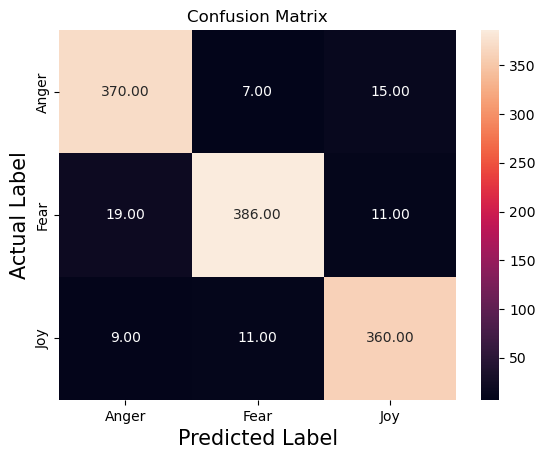

In [16]:
logr_cv = LogisticRegression(random_state = 0)
logr_cv.fit(X_train_cv, y_train)
logr_cv_pred = logr_cv.predict(X_test_cv)

evaluate(y_test, logr_cv_pred)

### B. Using TF-IDF Vectorizer

Model Accuracy: 92.59%
Classification Report:
               precision    recall  f1-score   support

       anger       0.92      0.93      0.93       392
        fear       0.94      0.90      0.92       416
         joy       0.91      0.95      0.93       380

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188



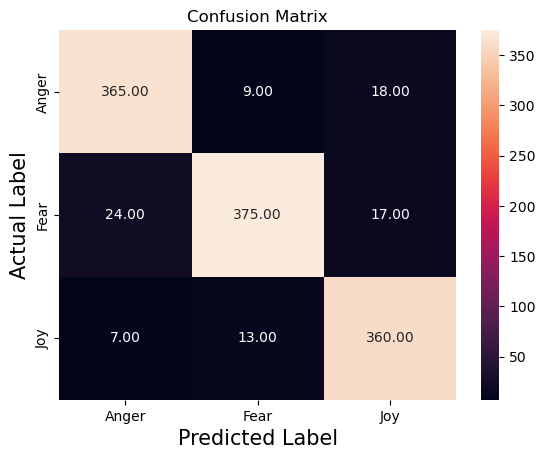

In [17]:
logr_tfidf = LogisticRegression(random_state = 0)
logr_tfidf.fit(X_train_tfidf, y_train)
logr_tfidf_pred = logr_tfidf.predict(X_test_tfidf)

evaluate(y_test, logr_tfidf_pred)

## Second : Naive Bayes classifier

### A. Using Count Vectorizer

Model Accuracy: 89.65%
Classification Report:
               precision    recall  f1-score   support

       anger       0.88      0.91      0.90       392
        fear       0.89      0.91      0.90       416
         joy       0.92      0.87      0.89       380

    accuracy                           0.90      1188
   macro avg       0.90      0.90      0.90      1188
weighted avg       0.90      0.90      0.90      1188



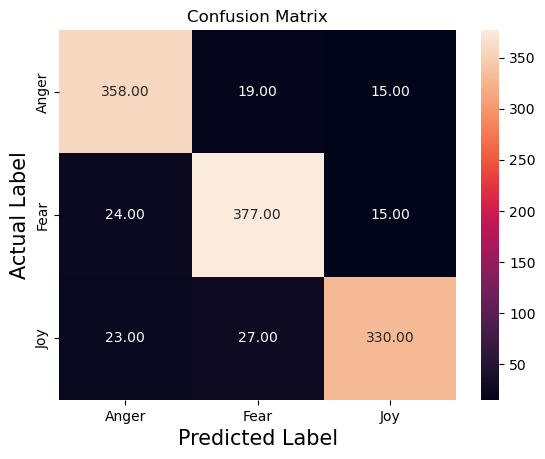

In [18]:
nbc_cv = MultinomialNB()
nbc_cv.fit(X_train_cv, y_train)
nbc_cv_pred = nbc_cv.predict(X_test_cv)

evaluate(y_test, nbc_cv_pred)

### B. Using TF-IDF Vectorizer

Model Accuracy: 89.98%
Classification Report:
               precision    recall  f1-score   support

       anger       0.88      0.92      0.90       392
        fear       0.91      0.88      0.90       416
         joy       0.91      0.90      0.91       380

    accuracy                           0.90      1188
   macro avg       0.90      0.90      0.90      1188
weighted avg       0.90      0.90      0.90      1188



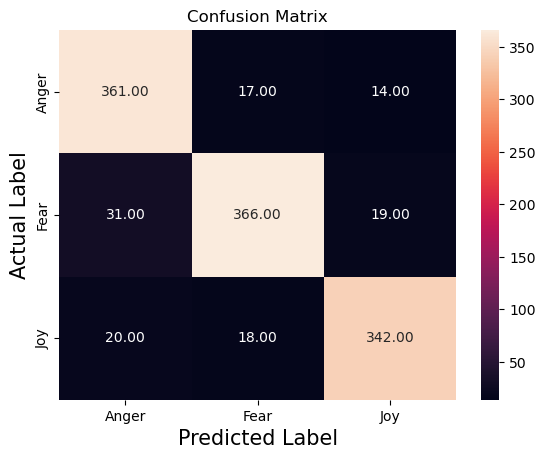

In [19]:
nbc_tfidf = MultinomialNB()
nbc_tfidf.fit(X_train_tfidf, y_train)
nbc_tfidf_pred = nbc_tfidf.predict(X_test_tfidf)

evaluate(y_test, nbc_tfidf_pred)